In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score , roc_curve , classification_report , precision_recall_curve

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26785,34251.0,1.275667,-0.935442,0.796874,-0.842222,-1.264062,0.222628,-1.295561,0.327107,-0.403311,...,0.432035,1.085385,-0.122598,-0.294331,0.308474,-0.013769,0.036093,0.008792,29.95,0
141374,84274.0,1.198914,0.142687,-0.332357,0.246791,0.297566,-0.400108,0.414868,-0.170022,-0.489580,...,-0.349563,-1.165296,-0.026684,-0.515054,0.373304,0.166423,-0.074893,0.001255,59.95,0
230404,146319.0,-11.681064,-7.479451,-9.961159,0.173905,-5.913252,2.438000,6.081253,0.233255,-0.098561,...,-0.958172,1.608332,-2.922992,-1.053042,-0.862059,-0.019443,1.685888,1.906685,1212.00,0
68635,53076.0,-1.745832,0.646216,1.800454,1.807152,-1.059368,0.702370,-0.821863,1.305805,0.429821,...,-0.264798,-0.778313,-0.059399,0.043826,0.179670,-0.334324,-0.209191,-0.131980,24.52,0
62522,50300.0,0.209895,-1.989529,0.712909,0.502626,-1.814489,-0.100664,-0.179145,0.083294,0.855004,...,0.237614,-0.306173,-0.352646,0.619674,-0.147002,0.910046,-0.134493,0.092438,500.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

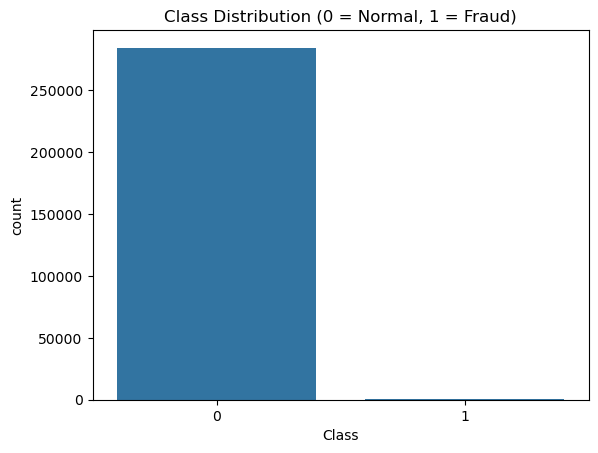

In [6]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

In [7]:
X = df.drop('Class',axis=1)
y = df['Class']

In [8]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [11]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
smote = SMOTE(random_state=42)
X_train_res , y_train_res = smote.fit_resample(X_train,y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())

Before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [13]:
models = {
    'Logistic_Regression':LogisticRegression(max_iter=1000),
    'Random_Forest_Classifier':RandomForestClassifier(n_estimators=100,random_state=42),
    'XGBoost':XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results ={}

for name,model in models.items():
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]


    recall = classification_report(y_test,y_pred,output_dict=True)['1']['recall']
    results[name] = {
        "Recall" : recall,
        'ROC-AUC Curve':roc_auc_score(y_test,y_prob)
    }

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))

C:\Users\ashut\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic_Regression
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.92      0.25        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.62     56962
weighted avg       1.00      0.99      0.99     56962


Random_Forest_Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\ashut\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:03:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.85      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
print(results)

{'Logistic_Regression': {'Recall': 0.9183673469387755, 'ROC-AUC Curve': 0.9794697229623419}, 'Random_Forest_Classifier': {'Recall': 0.8469387755102041, 'ROC-AUC Curve': 0.9801448030675408}, 'XGBoost': {'Recall': 0.8469387755102041, 'ROC-AUC Curve': 0.9824832683495457}}


In [15]:
best_model_name = max(results, key=lambda x: results[x]["Recall"])
print("Best Model:", best_model_name)

Best Model: Logistic_Regression


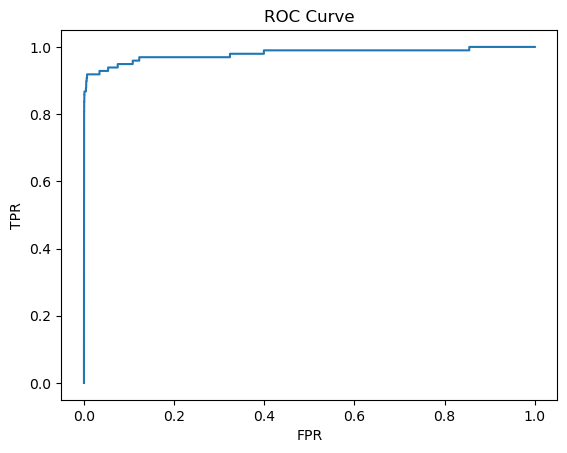

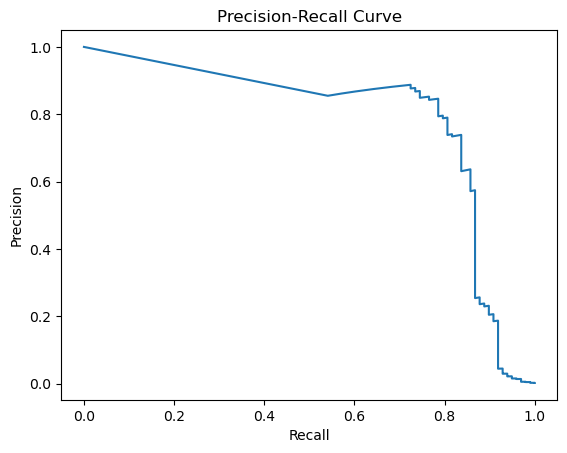

In [20]:
model = models[best_model_name]
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [21]:
thresholds = np.arange(0.1, 0.9, 0.05)

best_threshold = 0
best_recall = 0

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    recall_t = classification_report(
        y_test, y_pred_thresh, output_dict=True
    )['1']['recall']

    if recall_t > best_recall:
        best_recall = recall_t
        best_threshold = t

print("Best Threshold:", best_threshold)
print("Best Fraud Recall:", best_recall)

Best Threshold: 0.1
Best Fraud Recall: 0.9387755102040817


In [22]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# TRAIN SCORES
y_train_prob = model.predict_proba(X_train)[:,1]
y_train_pred = (y_train_prob >= best_threshold).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_prob)

# TEST SCORES
y_test_pred = (y_prob >= best_threshold).astype(int)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_prob)

print("TRAIN METRICS")
print("Accuracy:", train_accuracy)
print("Recall (Fraud):", train_recall)
print("ROC-AUC:", train_roc_auc)

print("\nTEST METRICS")
print("Accuracy:", test_accuracy)
print("Recall (Fraud):", test_recall)
print("ROC-AUC:", test_roc_auc)

TRAIN METRICS
Accuracy: 0.9283021352235072
Recall (Fraud): 0.949238578680203
ROC-AUC: 0.9875495245285943

TEST METRICS
Accuracy: 0.9275306344580597
Recall (Fraud): 0.9387755102040817
ROC-AUC: 0.9794697229623419


In [23]:
import joblib

joblib.dump(model,'fraud_model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(best_threshold,'thresshold.pkl')

print("Model, scaler, and threshold saved successfully!")

Model, scaler, and threshold saved successfully!
